Below picture is the methodology that will implemented phase by phase: 

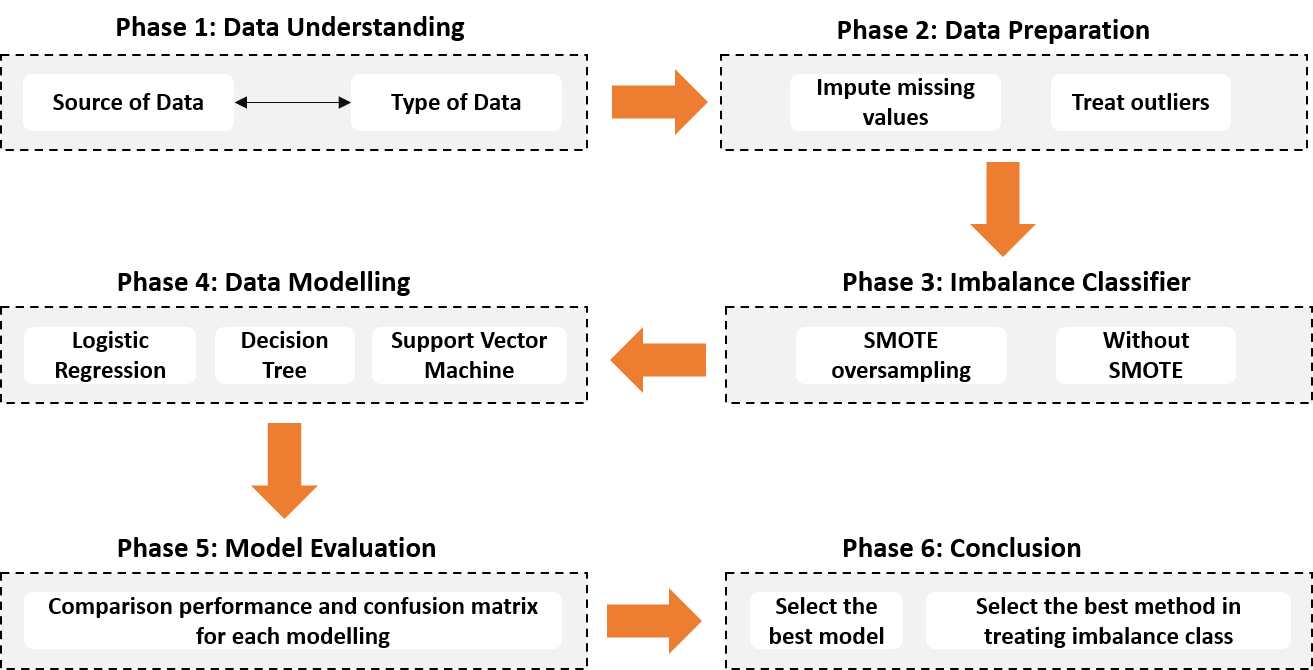

### 1.1 Introduction

The dataset that we used to predict contains the records about staff in a company. There are three main aspects about a staff in this dataset which are his/her profiles, workloads and tasks achieved. Our label variable is PerformerCategory which determine whether the staff is a high performer or low performer. 
The profiles include staff position type (e.g. manager, supervisor,operator), position status (e.g. permanent, contract), career track (e.g. marketing, finance), Nationality, Education (e.g. degree, master, phd), Branch (e.g. KL, Shah Alam), position level (e.g. senior executive, junior executive). Due to privacy, the actual values have been converted to certain values, such as StatusA, StatusB, etc.
For workload variables are divided into four which are generally the amount of time spend to do their jobs, while task variables consists of 23 tasks which represent their achievement.

### 1.2 Research Questions
1. Which machine learning model is the best to predict PerformerCategory?
2. Which combination of machine learning and SMOTE imbalanced classifier that yield better sensitivity?

### 1.3 Research Objectives
1. To evaluate the performance of various machine learning techniques
2. To validate constructed machine learning algorithm with SMOTE imbalanced classifier and without it

### ---------------------------------------------------------------------------------------------------------------------------------------------------
## Phase 1: Data Understanding

In this section, we will follow from our methodology above. Below is the details of our approach:
1. import data in excel 
2. statistic summary for all variables
3. data exploration (will check distribution for each variables)

### 2.1 Import data in excel

In [1]:
import pandas as pd
import numpy as np

#read csv file
prod = pd.read_csv("productivity_dataset.csv")
prod.head(5)

,Index,PositionType,PositionStatus,CareerTrack,Nationality,EducationLevel,Branch,PositionLevel,Task1,Task2,...,Task19,Task20,Task21,Task22,Task23,Workload1,Workload2,Workload3,Workload4,PerformerCategory
0,9301,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
1,9302,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
2,9303,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
3,9304,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
4,9305,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer


### 2.2 Statistic summary 

In [2]:
prod.describe(include="all")

,Index,PositionType,PositionStatus,CareerTrack,Nationality,EducationLevel,Branch,PositionLevel,Task1,Task2,...,Task19,Task20,Task21,Task22,Task23,Workload1,Workload2,Workload3,Workload4,PerformerCategory
count,9910.000000,9910,9910,9910,9910,9910,9476,9910,9910.000000,9910.000000,...,9910.000000,9910.000000,9.910000e+03,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910
unique,NaN,2,4,4,2,6,12,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,TypeB,StatusA,TrackA,local,LevelB,BranchL,LevelC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LowPerformer
freq,NaN,8321,9078,8231,9832,6127,4325,5792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7930
mean,4954.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.856710,0.563875,...,0.099395,0.002018,3.508933e+03,0.597982,0.657820,20.369627,5.728254,12.430071,15.486680,NaN
std,2860.914918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.721752,1.212137,...,0.321324,0.047076,3.458880e+04,1.353852,1.761563,12.499426,4.815636,9.333782,14.785491,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2477.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,10.000000,0.000000,4.000000,7.000000,NaN
50%,4954.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,22.000000,5.000000,12.000000,12.000000,NaN
75%,7431.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,32.000000,9.000000,19.000000,16.000000,NaN


### 2.3 Data exploration (display each categorical variables distribution)

##### Variable: PositionType

In [3]:
prod['PositionType'].value_counts(normalize=True)

TypeB    0.839657
TypeA    0.160343
Name: PositionType, dtype: float64

<AxesSubplot:ylabel='PositionType'>

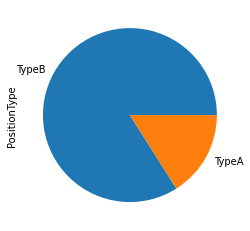

In [4]:
prod['PositionType'].value_counts(normalize=True).plot.pie()

TypeB is the highest position type in the company, 83% and TypeA is 16%.

##### Variable: PositionStatus

In [5]:
prod['PositionStatus'].value_counts(normalize=True)

StatusA    0.916044
StatusD    0.062462
StatusB    0.016246
StatusC    0.005247
Name: PositionStatus, dtype: float64

<AxesSubplot:>

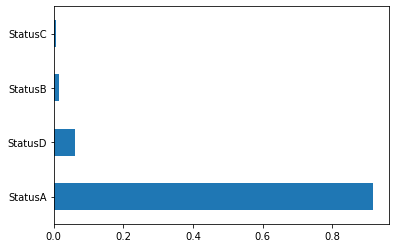

In [6]:
prod['PositionStatus'].value_counts(normalize=True).plot.barh()

StatusA is the highest position status in the company, 91%, while StatusC is the lowest, 0.5% 

##### Variable: CareerTrack

In [7]:
prod['CareerTrack'].value_counts(normalize=True)

TrackA    0.830575
TrackC    0.132190
TrackB    0.030474
TrackD    0.006761
Name: CareerTrack, dtype: float64

<AxesSubplot:>

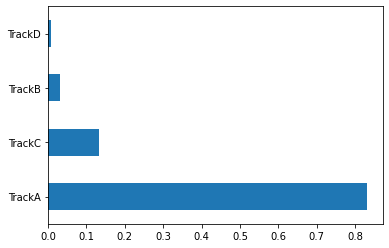

In [8]:
prod['CareerTrack'].value_counts(normalize=True).plot.barh()

TrackA is the highest of career track in the company, 83%, while TrackD is the lowest, 0.6%.

##### Variable: Nationality

In [9]:
prod['Nationality'].value_counts(normalize=True)

local        0.992129
Foreigner    0.007871
Name: Nationality, dtype: float64

<AxesSubplot:ylabel='Nationality'>

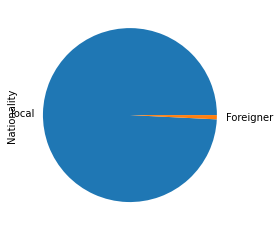

In [10]:
prod['Nationality'].value_counts(normalize=True).plot.pie()

Local is the highest nationality in the company, 99.2% while Foreigner is 0.78%.

##### Variable: EducationLevel

In [11]:
prod['EducationLevel'].value_counts(normalize=True)

LevelB     0.618264
LevelA     0.307669
No Data    0.049950
LevelC     0.020283
LevelD     0.003431
LevelE     0.000404
Name: EducationLevel, dtype: float64

<AxesSubplot:>

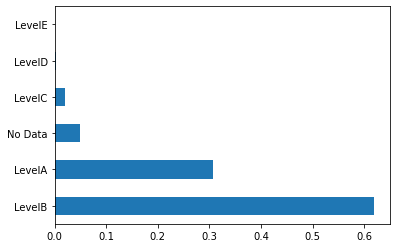

In [12]:
prod['EducationLevel'].value_counts(normalize=True).plot.barh()

Level B is the highest level of education in the company, 61.8% while Level D and Level E is 0.3% and 0.04% respectively.

##### Variable: Branch

In [13]:
prod['Branch'].value_counts(normalize=True)

BranchL    0.456416
BranchD    0.073132
BranchG    0.072921
BranchI    0.063212
BranchE    0.059097
BranchA    0.053293
BranchH    0.042106
BranchM    0.041157
BranchF    0.041157
BranchC    0.037569
BranchB    0.034825
BranchJ    0.025116
Name: Branch, dtype: float64

<AxesSubplot:>

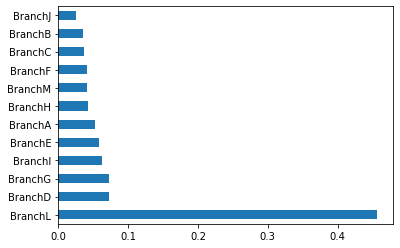

In [14]:
prod['Branch'].value_counts(normalize=True).plot.barh()

Branch L is the highest branch in the company, 45% while Branch J is the lowest, 2.5%

##### Variable:  PositionLevel

In [15]:
prod['PositionLevel'].value_counts(normalize=True)

LevelC    0.584460
LevelD    0.302119
LevelB    0.072856
LevelA    0.021796
LevelE    0.018769
Name: PositionLevel, dtype: float64

<AxesSubplot:ylabel='PositionLevel'>

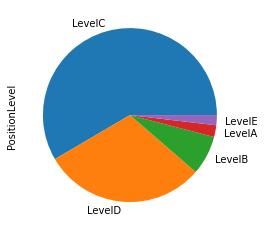

In [16]:
prod['PositionLevel'].value_counts(normalize=True).plot.pie()

LevelC is the highest level position in the company, 58% while LevelE is the lowest, 1.8%.

### ---------------------------------------------------------------------------------------------------------------------------------------------------
## Phase 2: Data Preparation

In this section, we will implement data processing as following:
1. Treat outliers
2. Impute missing values

### 3.1 Treat outliers

In this section, we will display each numerical variables in order to see the presence of outliers. Then we will drop the column that having extreme outliers. After that, we treat the other outliers (mild outlier) with Log Transformion using Power Transformer.

#### 3.1.1 Distribution of each numerical variables using barplot

array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Task1'}>,
        <AxesSubplot:title={'center':'Task2'}>,
        <AxesSubplot:title={'center':'Task3'}>,
        <AxesSubplot:title={'center':'Task4'}>],
       [<AxesSubplot:title={'center':'Task5'}>,
        <AxesSubplot:title={'center':'Task6'}>,
        <AxesSubplot:title={'center':'Task7'}>,
        <AxesSubplot:title={'center':'Task8'}>,
        <AxesSubplot:title={'center':'Task9'}>],
       [<AxesSubplot:title={'center':'Task10'}>,
        <AxesSubplot:title={'center':'Task11'}>,
        <AxesSubplot:title={'center':'Task12'}>,
        <AxesSubplot:title={'center':'Task13'}>,
        <AxesSubplot:title={'center':'Task14'}>],
       [<AxesSubplot:title={'center':'Task15'}>,
        <AxesSubplot:title={'center':'Task16'}>,
        <AxesSubplot:title={'center':'Task17'}>,
        <AxesSubplot:title={'center':'Task18'}>,
        <AxesSubplot:title={'center':'Task19'}>],
       [<AxesSubplot:title

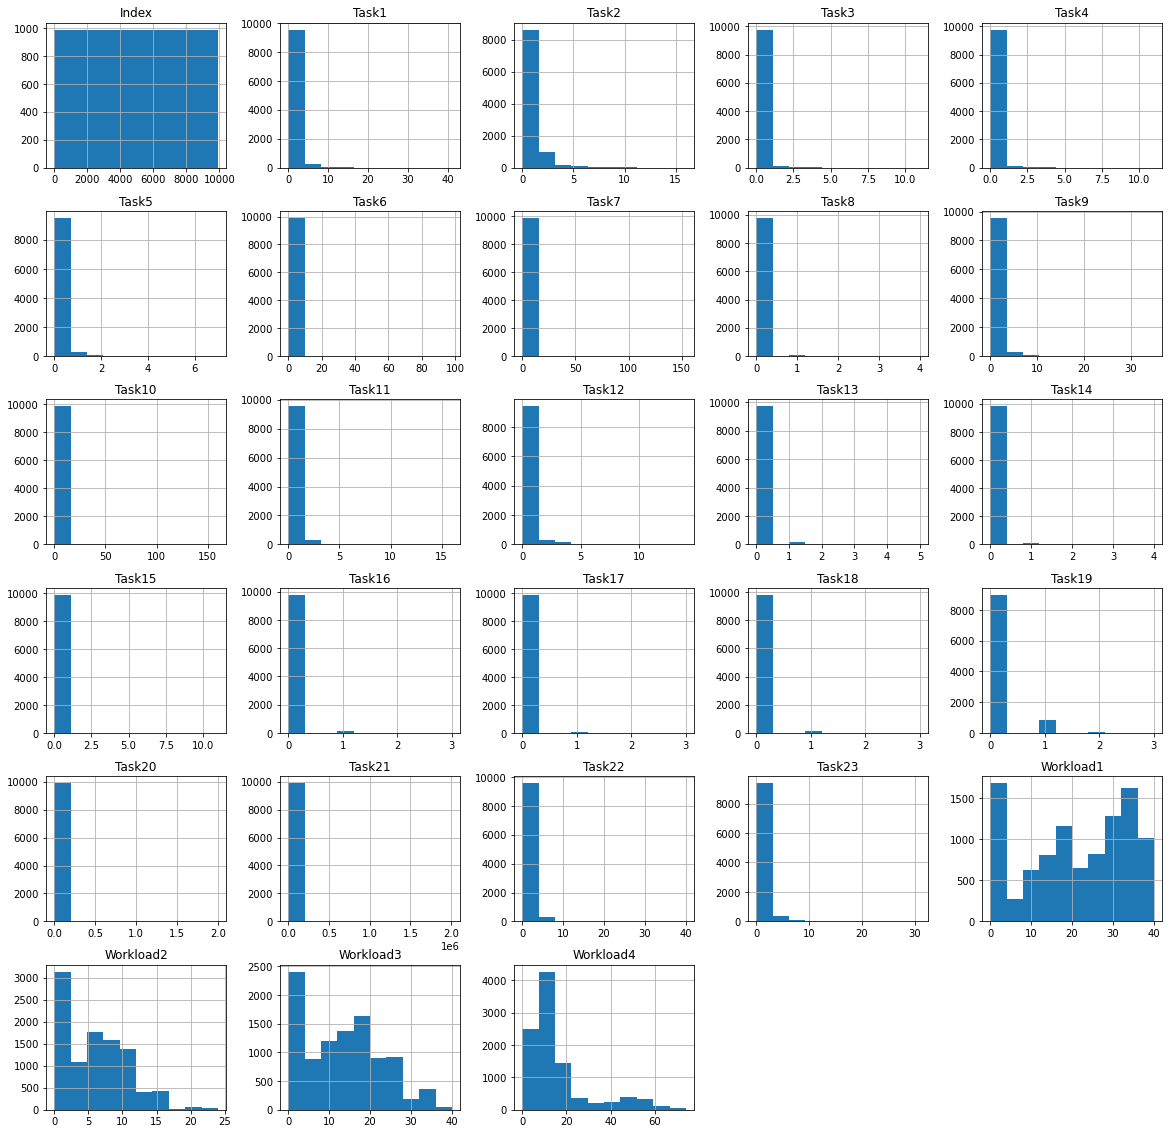

In [17]:
prod.hist(figsize=(20,20))

From this distribution, we can see that the data is skewed to the right with 0 values (the highest count) for all task variable from task1 until task 23.

#### 3.1.2 Distribution of each numerical variables using boxplot

<AxesSubplot:>

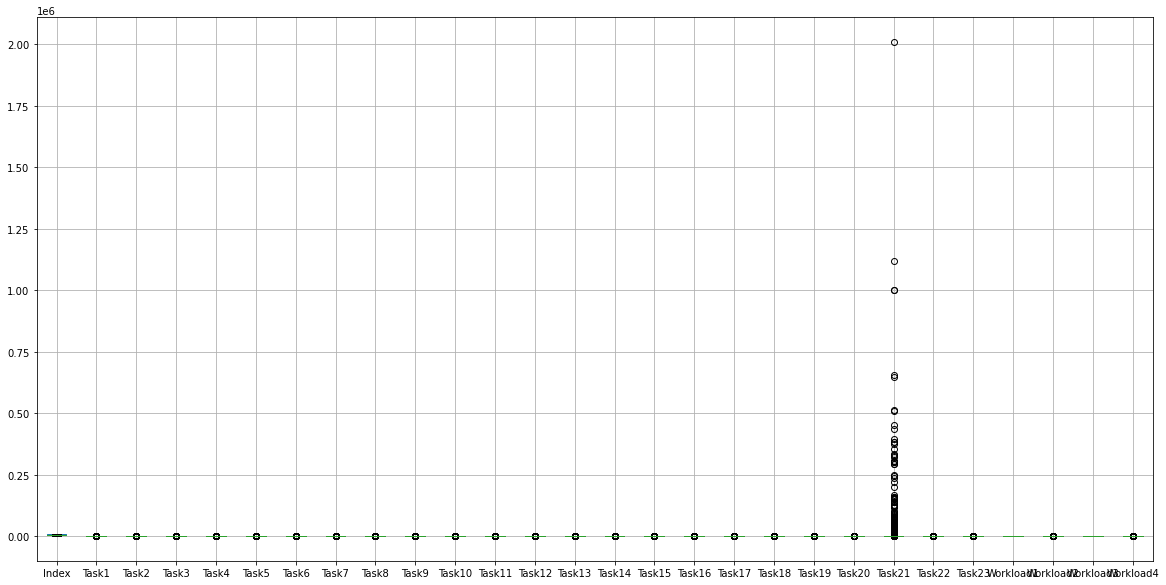

In [18]:
prod.boxplot(figsize=(20,10))

There's no presence extreme outliers in Workload 1 and Workload 3. Task 21 is contained numbers of extreme outlier compared to others task variables.

#### 3.1.3 Drop Task 21 variable 

In [19]:
data = prod
data = data.drop(['Task21'], axis = 1)
data

,Index,PositionType,PositionStatus,CareerTrack,Nationality,EducationLevel,Branch,PositionLevel,Task1,Task2,...,Task18,Task19,Task20,Task22,Task23,Workload1,Workload2,Workload3,Workload4,PerformerCategory
0,9301,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
1,9302,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
2,9303,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
3,9304,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
4,9305,TypeB,StatusD,TrackA,local,No Data,BranchL,LevelD,0,0,...,0,0,0,0,0,0,0,0,0,LowPerformer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9905,8807,TypeA,StatusA,TrackC,local,LevelA,BranchL,LevelC,3,0,...,0,1,0,0,0,11,16,32,45,LowPerformer
9906,8827,TypeA,StatusA,TrackC,local,LevelB,BranchL,LevelC,0,0,...,0,1,0,0,0,19,14,3,53,LowPerformer
9907,8831,TypeB,StatusA,TrackA,local,LevelA,BranchL,LevelC,0,0,...,0,1,0,0,0,8,4,3,12,LowPerformer
9908,8881,TypeB,StatusA,TrackA,local,LevelA,BranchL,LevelC,1,0,...,0,1,0,0,0,24,6,14,12,LowPerformer


Task21 variable has been drop from dataframe. We will proceed further phases without Task21 variable.

#### 3.1.4 Log Power Transformer to Treat Outliers

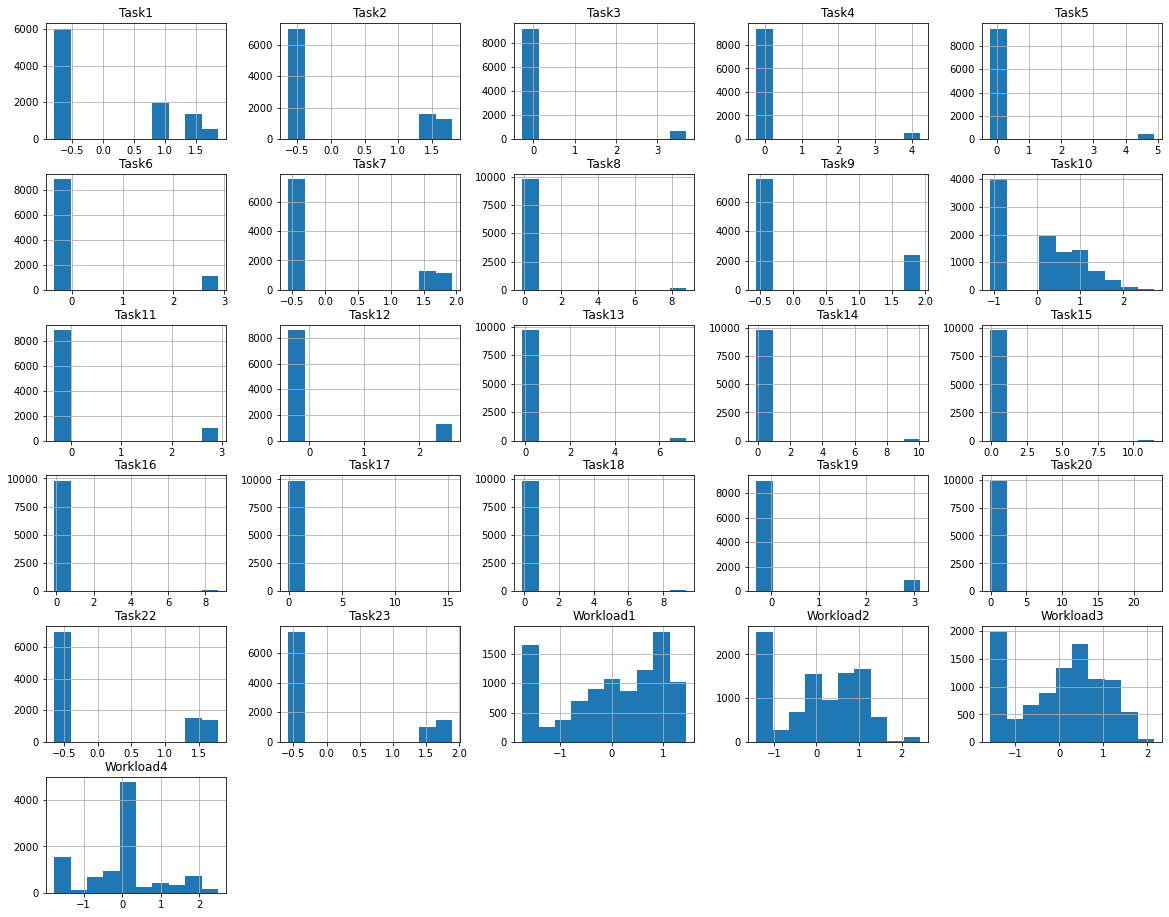

In [20]:
#PowerTransformer for non-linear transformation
from sklearn.preprocessing import PowerTransformer
prod_log2 = data
pt = PowerTransformer()
prod_log2.iloc[:, 8:34] = pd.DataFrame(pt.fit_transform(prod_log2.iloc[:, 8:34]))
prod_log2.iloc[:, 8:34] .hist(figsize=(20,16));



we can see that the distribution result has changed and not the same as previous method. In order to standardized the scale,
we need to normalize the log result to get the same scale for each numerical variable

### 3.2 Impute Missing Values

In this section, we will check missing values or null values. Then, we will impute missing values with Mode as Mode usually used for imputation in categorical variables.

#### 3.2.1 Check missing values/null values

In [21]:
data2 = prod_log2
data2.isnull().sum()

Index                  0
PositionType           0
PositionStatus         0
CareerTrack            0
Nationality            0
EducationLevel         0
Branch               434
PositionLevel          0
Task1                  0
Task2                  0
Task3                  0
Task4                  0
Task5                  0
Task6                  0
Task7                  0
Task8                  0
Task9                  0
Task10                 0
Task11                 0
Task12                 0
Task13                 0
Task14                 0
Task15                 0
Task16                 0
Task17                 0
Task18                 0
Task19                 0
Task20                 0
Task22                 0
Task23                 0
Workload1              0
Workload2              0
Workload3              0
Workload4              0
PerformerCategory      0
dtype: int64

Branch variable has 434 missing values.

#### 3.2.2 Impute Branch variable with Mode

In [22]:
data2['Branch'].value_counts()

BranchL    4325
BranchD     693
BranchG     691
BranchI     599
BranchE     560
BranchA     505
BranchH     399
BranchM     390
BranchF     390
BranchC     356
BranchB     330
BranchJ     238
Name: Branch, dtype: int64

checking each of values in 'Branch' column, BranchL is the most frequent ones

In [23]:
prod_impute = data2.fillna(data2['Branch'].value_counts().index[0])

Branch column has been impute with Mode (BranchL)

In [24]:
prod_impute['Branch'].value_counts()

BranchL    4759
BranchD     693
BranchG     691
BranchI     599
BranchE     560
BranchA     505
BranchH     399
BranchM     390
BranchF     390
BranchC     356
BranchB     330
BranchJ     238
Name: Branch, dtype: int64

<AxesSubplot:>

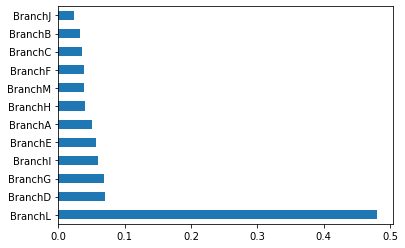

In [25]:
prod_impute['Branch'].value_counts(normalize=True).plot.barh()

After replacing missing values of the Branch variable, we can see that BranchL value is increasing from 4325 to 4759

In [26]:
prod_impute['Branch'].isnull().sum()

0

There is no missing value in Branch variable

### ---------------------------------------------------------------------------------------------------------------------------------------------------
## Phase 3: Imbalance Classifier

In this section, we will implement few steps to imbalance the data with SMOTE and without SMOTE as below details:
1. check distribution of label variable which is PerformerCategory
2. Replace PerformerCategory Variable to 0 and 1
3. Encoding categorical variables to numerical values
4. Merge with encode dataframe & drop the existing categorical variable
5. Divide X and Y with independent variables and target variable respectively
6. Standarize the data
7. Split data into training & testing
8. Fit model LR, SVM, DT without SMOTE
9. Fit model LR, SVM, DT with SMOTE

### 4.1 Check distribution of label variable  

In [27]:
prod_impute['PerformerCategory'].value_counts(normalize=True)

LowPerformer     0.800202
HighPerformer    0.199798
Name: PerformerCategory, dtype: float64

<AxesSubplot:>

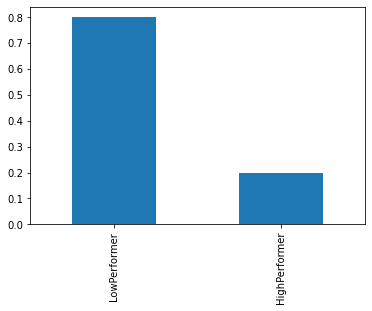

In [28]:
prod_impute['PerformerCategory'].value_counts(normalize=True).plot.bar()

LowPerformer is the highest values compared to HighPerformer which is 80% and 20% respectively.

### 4.2 Replace PerformerCategory Variable to 0 and 1

In [29]:
mapping = {'LowPerformer':0,
           'HighPerformer':1,
          }
prod_impute['PerformerCategory'] = prod_impute.PerformerCategory.map(mapping)

We replaced LowPerformer as 0, while HighPerformer as 1

In [30]:
prod_impute['PerformerCategory'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: PerformerCategory, dtype: int64

values of PerformerCategory has been replaced with 0 and 1

<AxesSubplot:>

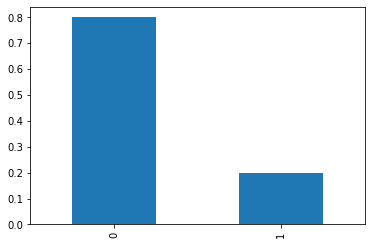

In [31]:
prod_impute['PerformerCategory'].value_counts(normalize=True).plot.bar()

we can see that values of PerformerCategory has changed to 0 and 1

### 4.3 Encoding categorical variables to numerical values

In [32]:
prod_encode = pd.get_dummies(prod_impute[['PositionType', 'PositionStatus', 'CareerTrack', 'Nationality', 'EducationLevel', 'Branch', 'PositionLevel']])
prod_encode

,PositionType_TypeA,PositionType_TypeB,PositionStatus_StatusA,PositionStatus_StatusB,PositionStatus_StatusC,PositionStatus_StatusD,CareerTrack_TrackA,CareerTrack_TrackB,CareerTrack_TrackC,CareerTrack_TrackD,...,Branch_BranchH,Branch_BranchI,Branch_BranchJ,Branch_BranchL,Branch_BranchM,PositionLevel_LevelA,PositionLevel_LevelB,PositionLevel_LevelC,PositionLevel_LevelD,PositionLevel_LevelE
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9905,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
9906,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
9907,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9908,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Categorical variables have changed to numerical variables in order to fit with the supervised machine learning model

### 4.4 Merge with encode dataframe & drop the existing categorical variable

In [33]:
prod_merge = pd.merge(prod_encode, prod_impute, right_index=True, left_index=True)
prod_merge

,PositionType_TypeA,PositionType_TypeB,PositionStatus_StatusA,PositionStatus_StatusB,PositionStatus_StatusC,PositionStatus_StatusD,CareerTrack_TrackA,CareerTrack_TrackB,CareerTrack_TrackC,CareerTrack_TrackD,...,Task18,Task19,Task20,Task22,Task23,Workload1,Workload2,Workload3,Workload4,PerformerCategory
0,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
1,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
2,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
3,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
4,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9905,1,0,1,0,0,0,0,0,1,0,...,-0.107397,3.124100,-0.043829,-0.647851,-0.576801,-0.662376,1.656221,1.671790,1.658602,0
9906,1,0,1,0,0,0,0,0,1,0,...,-0.107397,3.124100,-0.043829,-0.647851,-0.576801,-0.029453,1.430303,-0.938324,1.913887,0
9907,0,1,1,0,0,0,1,0,0,0,...,-0.107397,3.124100,-0.043829,-0.647851,-0.576801,-0.919065,-0.117086,-0.938324,0.046239,0
9908,0,1,1,0,0,0,1,0,0,0,...,-0.107397,3.124100,-0.043829,-0.647851,-0.576801,0.340613,0.283579,0.333833,0.046239,0


we have merged encode dataframe with current dataframe

In [34]:
data1 = prod_merge
data1 = data1.drop(['Index', 'PositionType', 'PositionStatus', 'CareerTrack', 'Nationality', 'EducationLevel', 'Branch', 'PositionLevel'], axis = 1)

In [35]:
data1

,PositionType_TypeA,PositionType_TypeB,PositionStatus_StatusA,PositionStatus_StatusB,PositionStatus_StatusC,PositionStatus_StatusD,CareerTrack_TrackA,CareerTrack_TrackB,CareerTrack_TrackC,CareerTrack_TrackD,...,Task18,Task19,Task20,Task22,Task23,Workload1,Workload2,Workload3,Workload4,PerformerCategory
0,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
1,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
2,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
3,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
4,0,1,0,0,0,1,1,0,0,0,...,-0.107397,-0.320091,-0.043829,-0.647851,-0.576801,-1.732152,-1.414449,-1.572583,-1.763985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9905,1,0,1,0,0,0,0,0,1,0,...,-0.107397,3.124100,-0.043829,-0.647851,-0.576801,-0.662376,1.656221,1.671790,1.658602,0
9906,1,0,1,0,0,0,0,0,1,0,...,-0.107397,3.124100,-0.043829,-0.647851,-0.576801,-0.029453,1.430303,-0.938324,1.913887,0
9907,0,1,1,0,0,0,1,0,0,0,...,-0.107397,3.124100,-0.043829,-0.647851,-0.576801,-0.919065,-0.117086,-0.938324,0.046239,0
9908,0,1,1,0,0,0,1,0,0,0,...,-0.107397,3.124100,-0.043829,-0.647851,-0.576801,0.340613,0.283579,0.333833,0.046239,0


We have dropped categorical variables and only numerical variables are remained in order to predict in further phases

### 4.5 Divide X and Y with independent variables and target variable respectively

In [36]:
X = np.array(data1.loc[:, data1.columns != 'PerformerCategory'])
y = np.array(data1.loc[:, data1.columns == 'PerformerCategory']).reshape(-1,1)

X is for independent variables while 
y is for our target variable which is PerformerCategory

### 4.6 Standardize the data

In [37]:
# standardize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

We standardize X with StandardScaler in order to give the same scale as we have encoded categorical variables in previous phase

### 4.7 Split data into training & testing

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

We have splitted data into training & testing where X_train & y_train is for training, while X_test and y_test is for testing

### 4.8 Fit model Logistic Regression, Support Vector Machine, Decision Tree without SMOTE

#### 4.8.1 Fit model Logistic Regression without SMOTE

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

Importing Logistic Regression and accuracy packages from sklearn

In [40]:
clf.fit(X_train, y_train.ravel())

LogisticRegression()

Fit the Logistic Regression model

#### 4.8.2 Fit model Support Vector Machine without SMOTE

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 0)

Importing Support Vector Machine and accuracy packages from sklearn

In [42]:
classifier.fit(X_train, y_train.ravel())

SVC(random_state=0)

Fit the Support Vector Machine model

#### 4.8.3 Fit model Decision Tree without SMOTE

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

Importing Desicion Tree packages

In [44]:
dtc = DecisionTreeClassifier()
dtc_train = dtc.fit(X_train, y_train.ravel())

fit the Descision Tree model

### 4.9 Fit model Logistic Regression, Support Vector Machine, Decision Tree with SMOTE

#### 4.9.1 Fit model Logistic Regression with SMOTE

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

Importing SMOTE packages and set random_state as 33

In [46]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

Fitting the training and testing set with SMOTE

<AxesSubplot:>

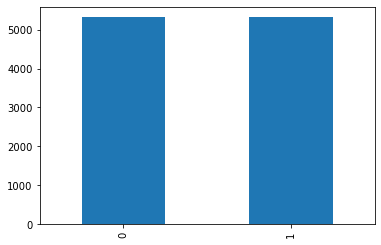

In [47]:
pd.Series(y_train_new).value_counts().plot.bar()

Observing data that has been balanced

In [48]:
clf.fit(X_train_new, y_train_new)

LogisticRegression()

Fitting Logistic Regression model

#### 4.9.2 Fit model Support Vector Machine with SMOTE

In [49]:
X_train_new_svm, y_train_new_svm = sm.fit_resample(X_train, y_train.ravel())

Fitting the training and testing set with SMOTE

<AxesSubplot:>

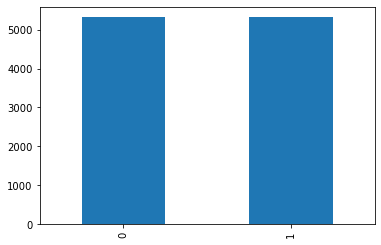

In [50]:
pd.Series(y_train_new_svm).value_counts().plot.bar()

Observing data that has been balanced

In [51]:
classifier.fit(X_train_new_svm, y_train_new_svm)

SVC(random_state=0)

Fitting the Support Vector Machine model

#### 4.9.3 Fitting Decision Tree Model with SMOTE

In [52]:
X_train_new_DT, y_train_new_DT = sm.fit_resample(X_train, y_train.ravel())

Fitting training and testing set with SMOTE

<AxesSubplot:>

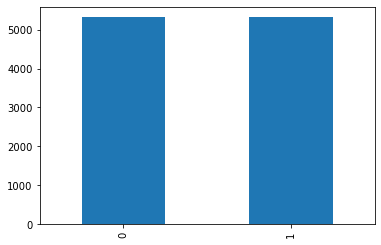

In [53]:
pd.Series(y_train_new).value_counts().plot.bar()

observe that data has been balanced

In [54]:
dtc_train2 = dtc.fit(X_train_new_DT, y_train_new_DT.ravel())

Fitting Decision Tree Model

### ---------------------------------------------------------------------------------------------------------------------------------------------------
## Phase 4: Data Modelling

In this section, we will focus on building machine learning model which are: 
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree

We will produce accuracy and sensitivity in order to see performance for each models.

### 5.1 Logistic Regression

#### 5.1.1 Without SMOTE

In [55]:
# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

Declaring train_pred for training dataset, while test_pred for testing dataset

##### 5.1.1.1 Accuracy 

In [56]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9433649646031029
Accuracy score for Testing Dataset =  0.9327422806481198


1. Accuracy for training: 94.3%
2. Accuracy for testing: 93.7%

##### 5.1.1.2 Sensitivity

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5313
           1       0.80      0.96      0.87      1326

    accuracy                           0.94      6639
   macro avg       0.89      0.95      0.92      6639
weighted avg       0.95      0.94      0.95      6639



Sensitivity for training

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2617
           1       0.77      0.94      0.85       654

    accuracy                           0.93      3271
   macro avg       0.88      0.94      0.90      3271
weighted avg       0.94      0.93      0.94      3271



Sensitivity for testing

1. Sensitivity for training is 96%
2. Sensitivity for testing is 94%

##### 5.1.1.3 Correlation matrix

In [59]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1   All
True                       
0          4989   324  5313
1            52  1274  1326
All        5041  1598  6639


###### Correlation for training dataset: 56 out of 1326 instances belongs to 1 have been classified as class 0

In [60]:
56/1326

0.042232277526395176

##### We have classified 4.2% of the high performer cases as low performer for training dataset

In [61]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0    1   All
True                      
0          2436  181  2617
1            39  615   654
All        2475  796  3271


Correlation for training dataset: 37 out of 654 instances belongs to 1 have been classified as class 0

In [62]:
37/654

0.05657492354740061

We have classified 5.6% of the high performer cases as low performer for testing dataset

#### 5.1.2 SMOTE

##### 5.1.2.1 Accuracy 

In [63]:
# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

Declare train_pred for training dataset, while test_pred for testing dataset

In [64]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9577451533973274
Accuracy score for Testing Dataset =  0.9327422806481198


1. Accuracy for training dataset is 95.8%
2. Accuracy for testing dataset is 93.7%

##### 5.1.2.2 Sensitivity

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_train_new, train_pred_sm))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5313
           1       0.94      0.98      0.96      5313

    accuracy                           0.96     10626
   macro avg       0.96      0.96      0.96     10626
weighted avg       0.96      0.96      0.96     10626



Sensitivity for training

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred_sm))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2617
           1       0.77      0.94      0.85       654

    accuracy                           0.93      3271
   macro avg       0.88      0.94      0.90      3271
weighted avg       0.94      0.93      0.94      3271



Sensitivity for testing

1. Sensivity for training: 98%
2. Sensitivity for testing: 94%

##### 5.1.2.3 Correlation matrix

In [67]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new.ravel(), train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          4989   324   5313
1           125  5188   5313
All        5114  5512  10626


##### Correlation for training dataset: 123 out of 5313 instances belongs to 1 have been classified as class 0

In [68]:
123/5313

0.023150762281197064

We have classified 2.3% of the high performer cases as low performer for training dataset

In [69]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0    1   All
True                      
0          2436  181  2617
1            39  615   654
All        2475  796  3271


In [70]:
37/654

0.05657492354740061

###### We have classified 5.6% of the high performer cases as low performer for training dataset

### 5.2 Support Vector Machine

#### 5.2.1 Without SMOTE

##### 5.2.1.1 Accuracy

In [71]:
# prediction for training dataset
train_pred_svm = classifier.predict(X_train)

# prediction for testing dataset
test_pred_svm = classifier.predict(X_test)

Declaring train_pred for training dataset, while test_pred for testing dataset

In [72]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_svm, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_svm, y_test))

Accuracy score for Training Dataset =  0.9813224883265552
Accuracy score for Testing Dataset =  0.9636196881687558


1. Accuracy for training: 97.8%
2. Accuracy for testing: 96.1%

##### 5.2.1.2 Sensitivity

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5313
           1       0.92      1.00      0.96      1326

    accuracy                           0.98      6639
   macro avg       0.96      0.99      0.97      6639
weighted avg       0.98      0.98      0.98      6639



Sensitivity for training

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2617
           1       0.88      0.95      0.91       654

    accuracy                           0.96      3271
   macro avg       0.93      0.96      0.94      3271
weighted avg       0.97      0.96      0.96      3271



Sensitivity for testing

1. Sensitivity for training: 100%
2. Sensitivity for testing: 96%

##### 5.2.1.3 Correlation Matrix

In [75]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred_svm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1   All
True                       
0          5192   121  5313
1             3  1323  1326
All        5195  1444  6639


In [76]:
3/1326

0.0022624434389140274

##### We have classified 0.2% of the high performer cases as low performer for training dataset

In [77]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_svm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0    1   All
True                      
0          2528   89  2617
1            30  624   654
All        2558  713  3271


In [78]:
26/654

0.039755351681957186

##### We have classified 3.9% of the high performer cases as low performer for testing dataset

#### 5.2.2 SMOTE

##### 5.2.2.1 Accuracy

In [79]:
# prediction for Training data
train_pred_new_svm = classifier.predict(X_train_new_svm)

# prediction for Testing data
test_pred__new_svm = classifier.predict(X_test)

Declaring train_pred for training dataset, while test_pred for testing dataset

In [80]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_new_svm, y_train_new_svm))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred__new_svm, y_test))

Accuracy score for Training Dataset =  0.9882364012798796
Accuracy score for Testing Dataset =  0.9636196881687558


1. Accuracy for training: 98.6%
2. Accuracy for testing: 96.1%

##### 5.2.2.2 Sensitivity

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_train_new_svm, train_pred_new_svm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5313
           1       0.98      1.00      0.99      5313

    accuracy                           0.99     10626
   macro avg       0.99      0.99      0.99     10626
weighted avg       0.99      0.99      0.99     10626



Sensitivity for training

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred__new_svm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2617
           1       0.88      0.95      0.91       654

    accuracy                           0.96      3271
   macro avg       0.93      0.96      0.94      3271
weighted avg       0.97      0.96      0.96      3271



Sensitivity for testing

1. Sensitivity for training: 100%
2. Sensitivity for testing: 96%

##### 5.2.2.3 Correlation Matrix

In [83]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new_svm.ravel(), train_pred_new_svm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          5192   121   5313
1             4  5309   5313
All        5196  5430  10626


In [84]:
4/5313

0.0007528703180877094

We have classified 0.07% of the high performer cases as low performer for training dataset

In [85]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred__new_svm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0    1   All
True                      
0          2528   89  2617
1            30  624   654
All        2558  713  3271


In [86]:
26/654

0.039755351681957186

We have classified 3.9% of the high performer cases as low performer for testing dataset

### 5.3 Decision Tree

#### 5.3.1 Without SMOTE

##### 5.3.1.1 Accuracy

In [87]:
# prediction for testing dataset
dtc_train_pred = dtc.predict(X_train)

# prediction for testing dataset
dtc_test_pred = dtc.predict(X_test)

Declaring train_pred for training dataset, while test_pred for testing dataset

In [88]:
print('Accuracy score for Training Dataset = ', accuracy_score(dtc_train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(dtc_test_pred, y_test))

Accuracy score for Training Dataset =  1.0
Accuracy score for Testing Dataset =  0.9944970956893916


1. Accuracy for training: 100%
2. Accuracy for testing: 99.4%

##### 5.3.1.2 Sensitivity

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_train, dtc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5313
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      6639
   macro avg       1.00      1.00      1.00      6639
weighted avg       1.00      1.00      1.00      6639



Sensitivity for training

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2617
           1       0.98      0.99      0.99       654

    accuracy                           0.99      3271
   macro avg       0.99      0.99      0.99      3271
weighted avg       0.99      0.99      0.99      3271



Sensitivity for testing

1. Sensitivity for training: 100%
2. Sensitivity for testing: 99%

##### 5.3.1.3 Correlation matrix

In [91]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), dtc_train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1   All
True                       
0          5313     0  5313
1             0  1326  1326
All        5313  1326  6639


In [92]:
0/1326

0.0

We have classified 0% of the high performer cases as low performer for training dataset

In [93]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), dtc_test_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0    1   All
True                      
0          2604   13  2617
1             5  649   654
All        2609  662  3271


In [94]:
6/654

0.009174311926605505

We have classified 0.9% of the high performer cases as low performer for testing dataset

#### 5.3.2 SMOTE

##### 5.3.2.1 Accuracy

In [95]:
# prediction for training dataset
dtc_train2_pred = dtc.predict(X_train_new_DT)

# prediction for testing dataset
dtc_test2_pred = dtc.predict(X_test)

Declaring train_pred for training dataset, while test_pred for testing dataset

In [96]:
print('Accuracy score for Training Dataset = ', accuracy_score(dtc_train2_pred, y_train_new_DT))
print('Accuracy score for Testing Dataset = ', accuracy_score(dtc_test2_pred, y_test))

Accuracy score for Training Dataset =  1.0
Accuracy score for Testing Dataset =  0.9944970956893916


1. Accuracy for training: 100%
2. Accuracy for testing: 99.4%

##### 5.3.2.2 Sensitivity

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_train_new_DT, dtc_train2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5313
           1       1.00      1.00      1.00      5313

    accuracy                           1.00     10626
   macro avg       1.00      1.00      1.00     10626
weighted avg       1.00      1.00      1.00     10626



Sensitivity for training

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_test2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2617
           1       0.98      0.99      0.99       654

    accuracy                           0.99      3271
   macro avg       0.99      0.99      0.99      3271
weighted avg       0.99      0.99      0.99      3271



Sensitivity for testing

1. Sensitivity for training: 100%
2. Sensitivity for testing: 99%

##### 5.3.2.3 Correlation matrix

In [99]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new_DT.ravel(), dtc_train2_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          5313     0   5313
1             0  5313   5313
All        5313  5313  10626


In [100]:
0/5313

0.0

We have classified 0% of the high performer cases as low performer for training dataset

In [101]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), dtc_test2_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0    1   All
True                      
0          2604   13  2617
1             5  649   654
All        2609  662  3271


In [102]:
6/654

0.009174311926605505

We have classified 0.9% of the high performer cases as low performer for testing dataset

### ---------------------------------------------------------------------------------------------------------------------------------------------------
## Phase 5: Model Evaluation

In this session, we will focus on below details:
1. Performance comparison for each models

### 6.1 Comparison of performance for Logistic Regression (without SMOTE vs SMOTE)


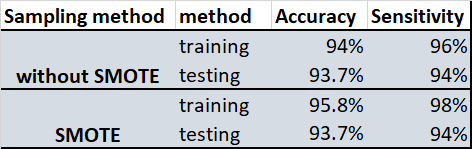

###### Result: 
1. Testing result of Accuracy of SMOTE and without SMOTE is similar, 93.7%
2. Testing result of Sensitivity of SMOTE and without SMOTE is similar, 94%

### 6.2 Comparison of performance for Support Vector Machine (without SMOTE vs SMOTE)

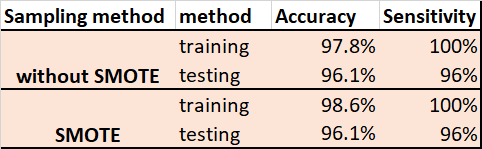

Result:
1. Testing result of Accuracy of SMOTE and without SMOTE is similar, 96.1%
2. Testing result of Sensitivity of SMOTE and without SMOTE is similar, 96%

### 6.3 Comparison of performance for Decision Tree (without SMOTE vs SMOTE)

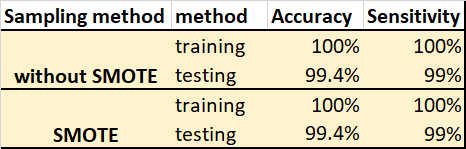

Result:

1. Testing result of Accuracy of SMOTE and without SMOTE is similar, 99.4%
2. Testing result of Sensitivity of SMOTE and without SMOTE is similar, 99%

### ---------------------------------------------------------------------------------------------------------------------------------------------------
## Phase 6: Conclusion

In this section, we will focus on as per below details: 
1. select the best machine learning model
2. select the best method in treating imbalance class
3. data visualization

In a classification problem accuracy will be the criteria for model selection in contrast with regression which using error estmations to detemine the best model. Based on the testing results shown above we concluded that the best model is Decision Tree followed by Support Vector Machine and Logistic Regression. 

Based on the SMOTE comparison the sensitivity for Decision Tree is the highest compared to Support Vector Machine and Logistic Regression. Eventhough the outcomes is similar for SMOTE and without SMOTE we have to ensure that the model do not bias towards the dominant class. Low Performer constitutes 80% from our target variable compared to High Perfomer 20% which is our main interest in the prediction.

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("productivity_dataset.csv")

df.head


<bound method NDFrame.head of       Index PositionType PositionStatus CareerTrack Nationality  \
0      9301        TypeB        StatusD      TrackA       local   
1      9302        TypeB        StatusD      TrackA       local   
2      9303        TypeB        StatusD      TrackA       local   
3      9304        TypeB        StatusD      TrackA       local   
4      9305        TypeB        StatusD      TrackA       local   
...     ...          ...            ...         ...         ...   
9905   8807        TypeA        StatusA      TrackC       local   
9906   8827        TypeA        StatusA      TrackC       local   
9907   8831        TypeB        StatusA      TrackA       local   
9908   8881        TypeB        StatusA      TrackA       local   
9909   9191        TypeB        StatusA      TrackA       local   

     EducationLevel   Branch PositionLevel  Task1  Task2  ...  Task19  Task20  \
0           No Data  BranchL        LevelD      0      0  ...       0       0   
1  

#### 7.1 Data Visualisation of Education Level Column 

Query 1: How many numbers of employee based on Position Status?

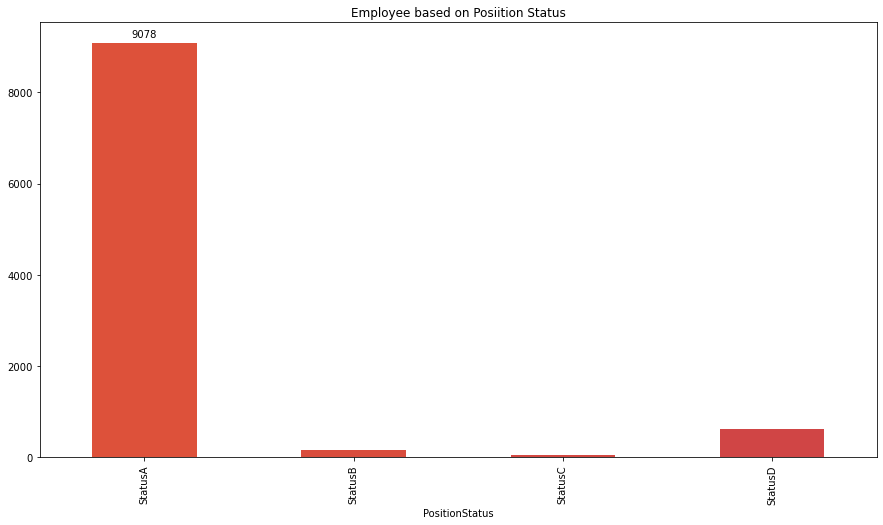

In [105]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

fig, ax = plt.subplots(figsize=(15, 8))
df.groupby(['PositionStatus'])['Index'].count().plot(kind='bar', title='Employee based on Posiition Status', color=color)

#to annotate the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    plt.show()

Answer: Position Status A is the highest number of employees with 9078

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Query 2: Distribution level of employee education level based on their position status?

In [106]:
# We create another variable to have two dataframe which contains a dummy variable.
prod_vis = df
# To make dummy data for criteria and memo status
mm_dummy_cr = pd.get_dummies(prod_vis['EducationLevel'])
# mm_dummy_ms = pd.get_dummies(prod_vis['PerformerCategory '])

# combining region with criteria and memo status
dummy_all = pd.concat([prod_vis[['PositionLevel']],mm_dummy_cr], axis = 1)

# to sum total MOA, MOU, Existing and Expired by Region
dummy_all_sum = dummy_all.groupby(['PositionLevel'], as_index=False).sum()
dummy_all_sum

,PositionLevel,LevelA,LevelB,LevelC,LevelD,LevelE,No Data
0,LevelA,199.0,17.0,0.0,0.0,0.0,0.0
1,LevelB,584.0,137.0,1.0,0.0,0.0,0.0
2,LevelC,2184.0,3580.0,28.0,0.0,0.0,0.0
3,LevelD,80.0,2337.0,76.0,5.0,1.0,495.0
4,LevelE,2.0,56.0,96.0,29.0,3.0,0.0


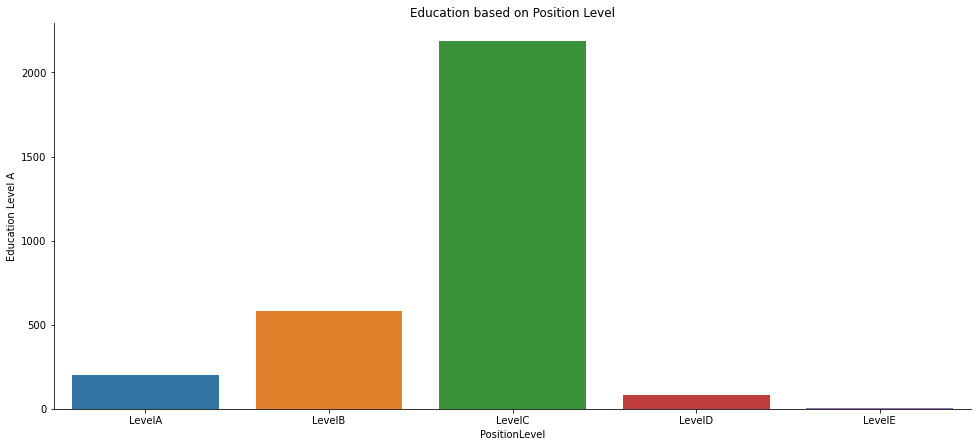

In [107]:
ax = sns.catplot(data=dummy_all_sum, kind='bar', x='PositionLevel', y='LevelA')
ax.fig.set_size_inches(15,6)
plt.title('Education based on Position Level')
plt.ylabel('Education Level A')
plt.xlabel('PositionLevel')
    
plt.show()

Answer: For Education Level A, Position Status Level A is 199, Position Status Level B 584, Position Status Level C is 2184, Position Status Level D is 80 and Position Level E is 2.

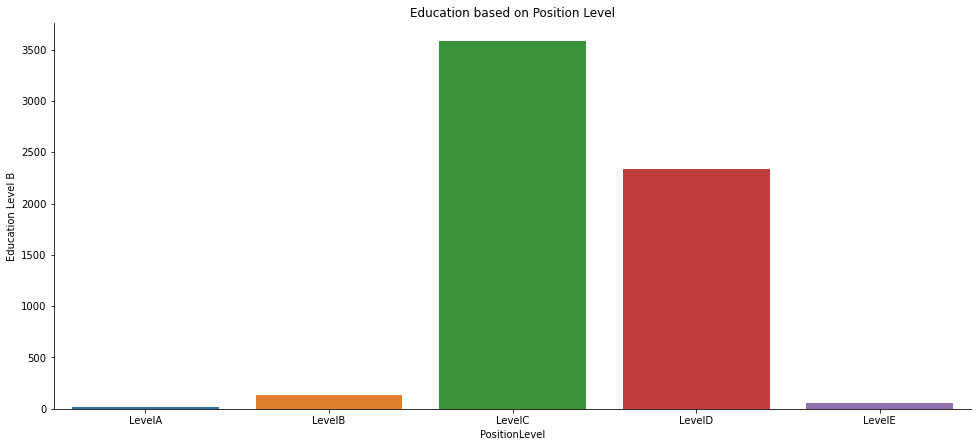

In [108]:
ax = sns.catplot(data=dummy_all_sum, kind='bar', x='PositionLevel', y='LevelB')
ax.fig.set_size_inches(15,6)
plt.title('Education based on Position Level')
plt.ylabel('Education Level B')
plt.xlabel('PositionLevel')
    
plt.show()

Answer: For Education Level B, Position Status Level A is 197, Position Status Level B 137, Position Status Level C is 3580, Position Status Level D is 2337 and Position Level E is 56.

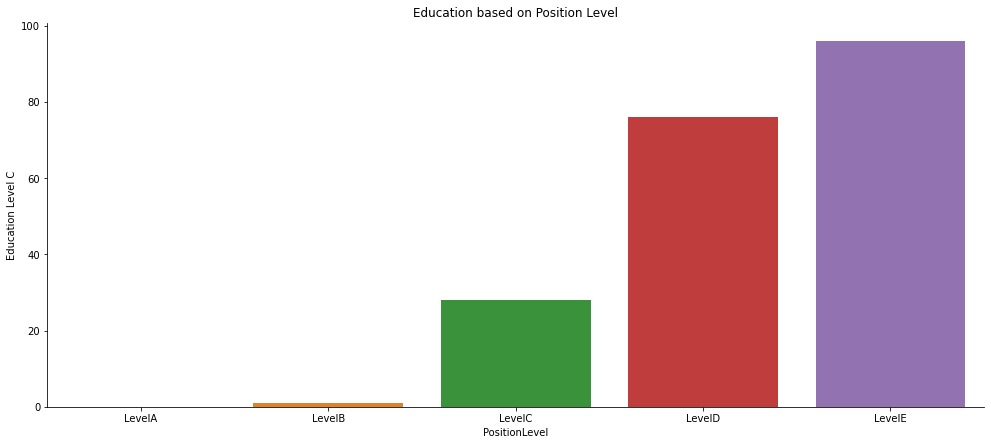

In [109]:
ax = sns.catplot(data=dummy_all_sum, kind='bar', x='PositionLevel', y='LevelC')
ax.fig.set_size_inches(15,6)
plt.title('Education based on Position Level')
plt.ylabel('Education Level C')
plt.xlabel('PositionLevel')
    
plt.show()

Answer: For Education Level C, Position Status Level A is 0, Position Status Level B 1, Position Status Level C is 28, Position Status Level D is 76 and Position Level E is 96.

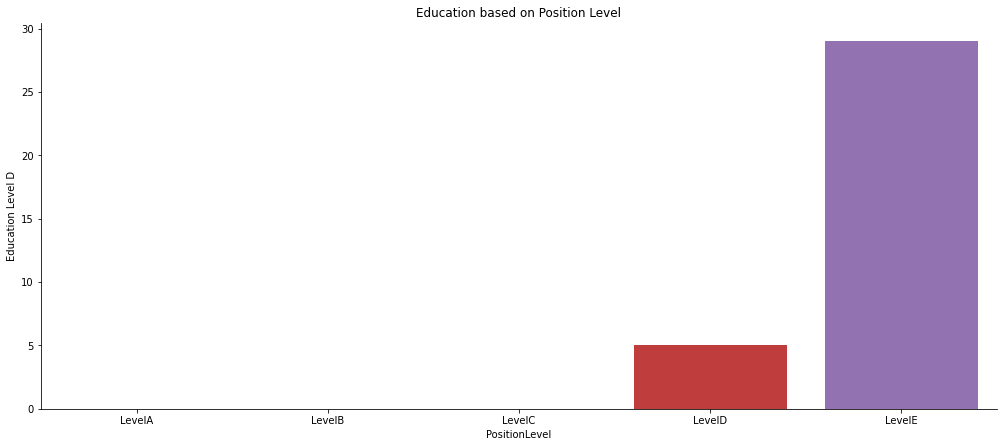

In [110]:
ax = sns.catplot(data=dummy_all_sum, kind='bar', x='PositionLevel', y='LevelD')
ax.fig.set_size_inches(15,6)
plt.title('Education based on Position Level')
plt.ylabel('Education Level D')
plt.xlabel('PositionLevel')
    
plt.show()

Answer: For Education Level D, Position Status Level A is 0, Position Status Level B 0, Position Status Level C is 0, Position Status Level D is 5 and Position Level E is 29.

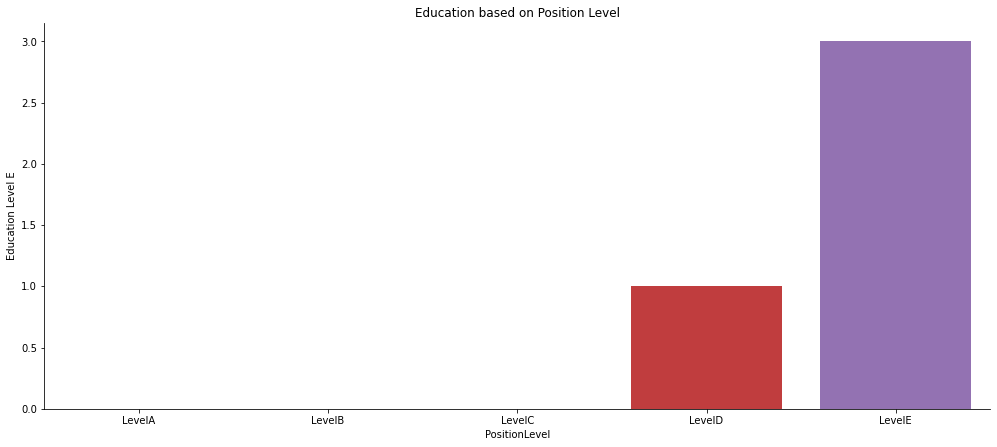

In [112]:
ax = sns.catplot(data=dummy_all_sum, kind='bar', x='PositionLevel', y='LevelE')
ax.fig.set_size_inches(15,6)
plt.title('Education based on Position Level')
plt.ylabel('Education Level E')
plt.xlabel('PositionLevel')
    
plt.show()

Answer: For Education Level E, Position Status Level A is 0, Position Status Level B 0, Position Status Level C is 0, Position Status Level D is 1 and Position Level E is 3.

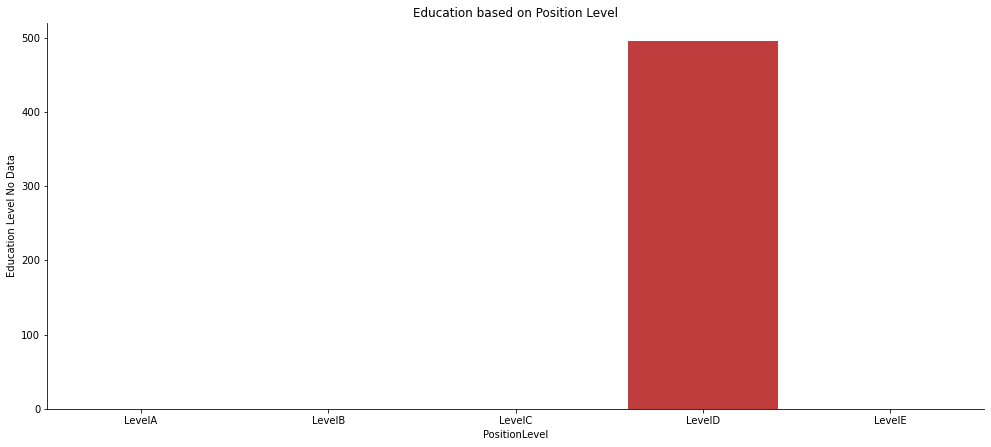

In [114]:
ax = sns.catplot(data=dummy_all_sum, kind='bar', x='PositionLevel', y='No Data')
ax.fig.set_size_inches(15,6)
plt.title('Education based on Position Level')
plt.ylabel('Education Level No Data')
plt.xlabel('PositionLevel')
    
plt.show()

Answer: For Education with No data, Position Status Level A is 0, Position Status Level B 0, Position Status Level C is 0, Position Status Level D is 495 and Position Level E is 0.

##### Visualisation Summary of Education Level based on Position Status

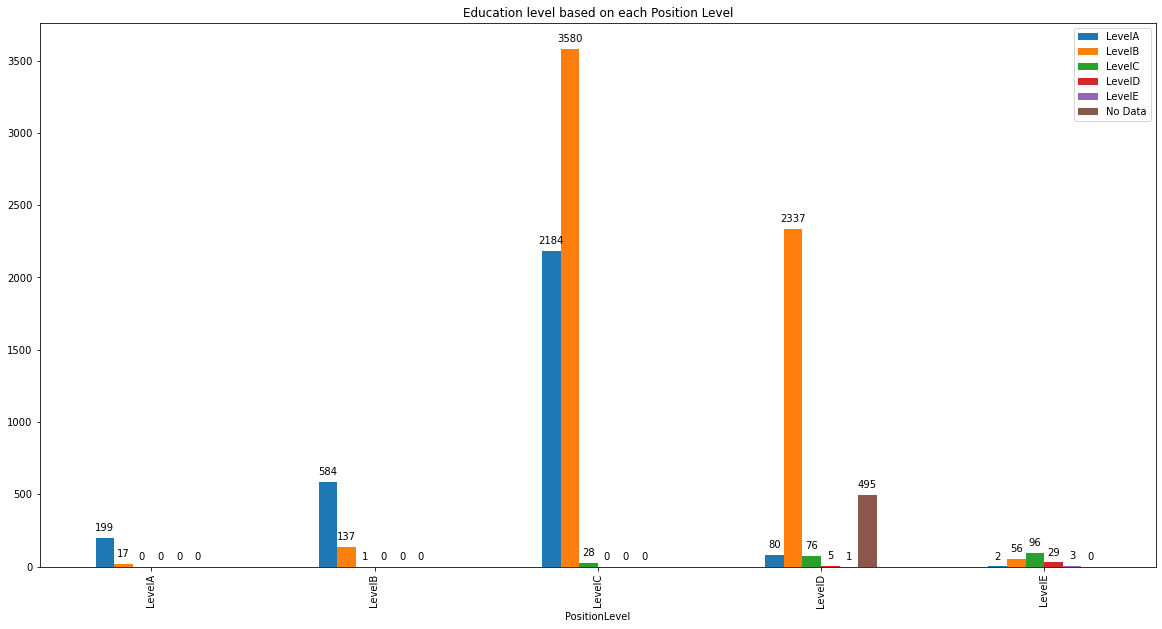

In [115]:
#set the size
fig, ax = plt.subplots(figsize=(20, 10))

#plot
pt = dummy_all_sum.plot(kind='bar', ax=ax, x="PositionLevel")

pt.set_title("Education level based on each Position Level")

#to annotate the bars
for p in pt.patches:
    pt.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

#### 7.2 Data Exploration of Nationality 

We are assuming the Position Type A and B are related to Part Time and Full Time employees.  

Query 3: How many employee of Position Type based on Nationality

In [116]:
# To make dummy data for Nationality
mm_dummy_n = pd.get_dummies(prod_vis['Nationality'])
# mm_dummy_ms = pd.get_dummies(prod_vis['PerformerCategory '])

# combining Position Type with Nationality
dummy = pd.concat([prod_vis[['PositionType']],mm_dummy_n], axis = 1)

# to sum total MOA, MOU, Existing and Expired by Region
dummy_sum = dummy.groupby(['PositionType'], as_index=False).sum()
dummy_sum

,PositionType,Foreigner,local
0,TypeA,3.0,1586.0
1,TypeB,75.0,8246.0


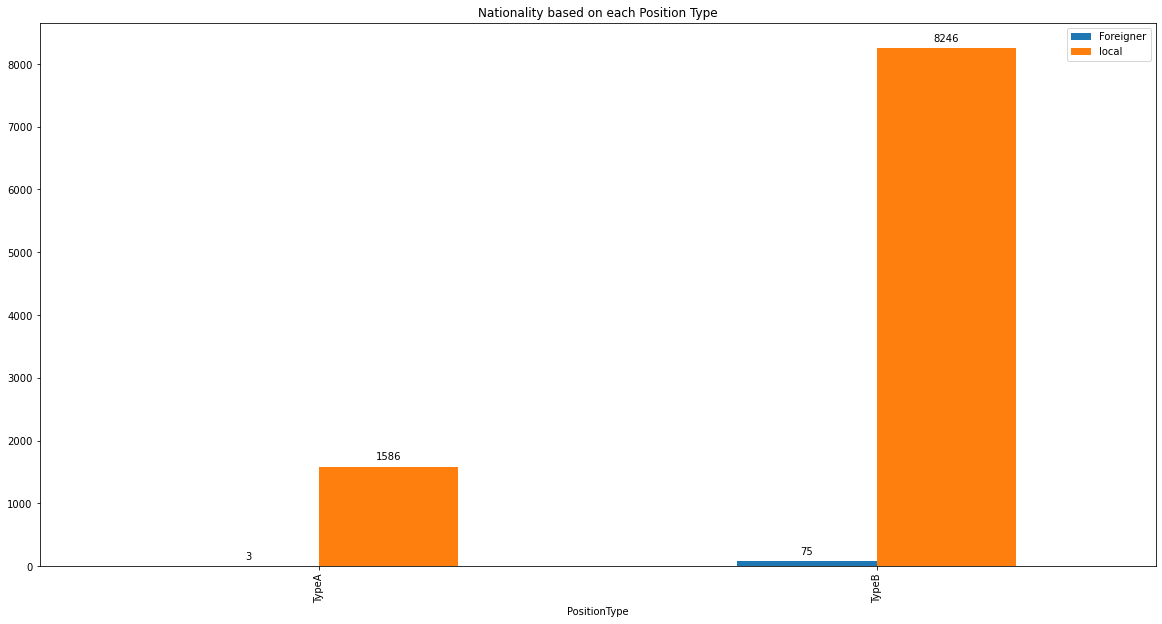

In [117]:
#set the size
fig, ax = plt.subplots(figsize=(20, 10))

#plot
pr = dummy_sum.plot(kind='bar', ax=ax, x="PositionType")

pr.set_title("Nationality based on each Position Type")

#to annotate the bars
for p in pr.patches:
    pr.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

Answer: The number of Employee in Type A  for locals is 1586 and Foreigners is 3. 
        The number of Employee in Type B for locals is 8246 and Foreigners is 75.